# Veri Seti Hikayesi
* totol_bill: Yemeğin Toplam Fiyatı
* tip: Bahşiş
* sex: Ücreti Ödeyen Kişinin Cinsiyeti(0 = male, 1 = female)
* smoker: Grupta Sigara İçen Var mı (0 = No, 1 = Yes)
* Day: Gün(3 = Thur, 4 = Fri , 5 = Sat, 6 = Sun)
* time: ne zaman (0 = day, 1 = night)
* size: grupta kaç kişi var ?

In [2]:
import seaborn as sns # Seaborn kütüphensini dahil etme 
tips = sns.load_dataset("tips") # seaborn kütüphanesinde bulunun tips veri setini çağırma işlemi
df = tips.copy() # tips veri setinin kopyasını alarak daha güvenli bir hale getirme işlemi
df.head() # veri setinin ilk 5 elemanını gösterme 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Veri Seti Hakkında Araştırmalar yapalım

* Eksik Değer Kontrolu ? 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


* Sayısal Değişkenler Hakkındaki Bilgiler

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [7]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [8]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [9]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [10]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [14]:
df[["smoker","sex"]].value_counts()

smoker  sex   
No      Male      97
Yes     Male      60
No      Female    54
Yes     Female    33
Name: count, dtype: int64

## Veri Seti Hakkındaki Araştırmalara Grafiksel olarak devam edelim  

 * Tip(bahşiş) in hangi istatistiklerden etkilendiğine bakalım
 * Örneğin;
 *         Cinsiyet tip verme miktarını etkiliyor mu
 *         Sigara içen insanlar mı daha ok tip veriyor yoksa içmeyenler mi 

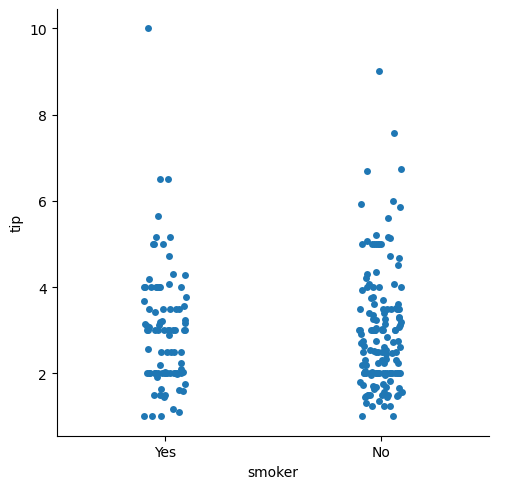

In [23]:
sns.catplot(x = "smoker", y = "tip", data = df, ); # Catplot bir grafik oluşturma işlemi yapar x ekseni y eksenini 
# veriyi nerden alacağını belirledik belirledik.

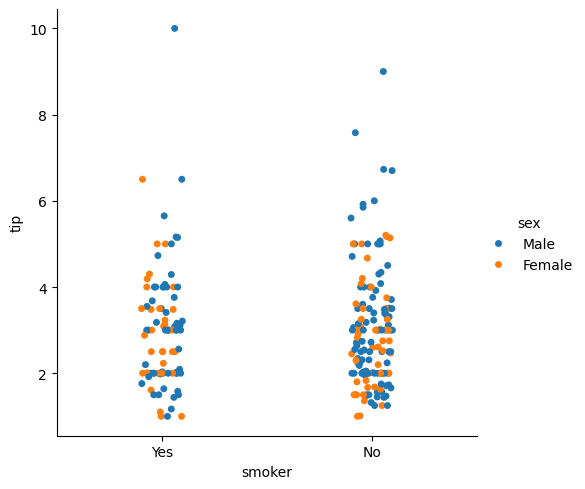

In [26]:
sns.catplot(x = "smoker", y = "tip", hue = "sex", data = df); # Bir eksen daha ekleyip cinsiyetle olan ilişksinide incelemiş olduk 

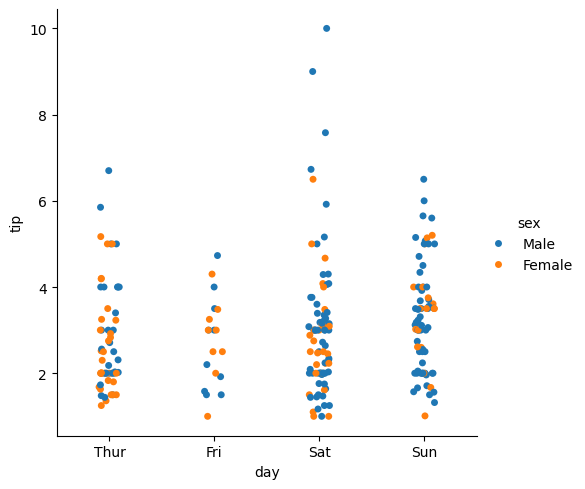

In [36]:
sns.catplot(x = "day" , y = "tip", data = df, hue= "sex");

# Şimdi Yeni Bir Kolon Ekleme İşlemi yapalım 

In [9]:
df["only_food_bill"] = df.total_bill - df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,only_food_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98


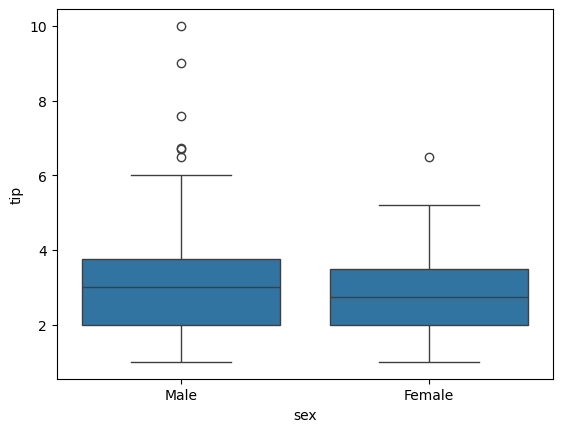

In [41]:
sns.boxplot(x = "sex", y = "tip", data = df); # Yoğunluklu olarak cinsiyetlerin ne kadar tip verdiklerine bakıyoruz 

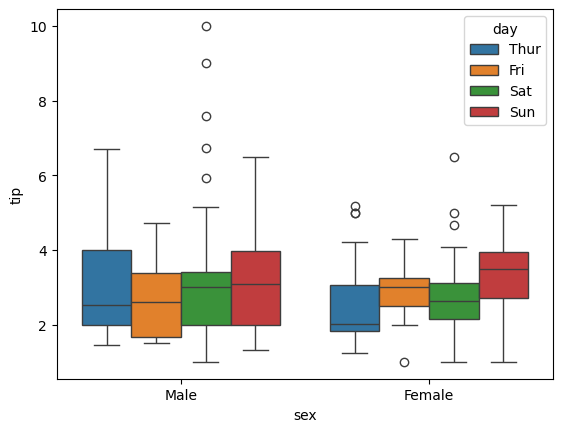

In [51]:
sns.boxplot(x = "sex", y = "tip", hue = "day", data = df);
# Günlere Göre Cinsiyetlerin ne Kadar Yoğınlukta Bahiş verdiğini inceledik 

## Şimdide Şunu İnceleyelim Acaba tipin falazla olduğu zamanlar only_food_bill de mi fazla 

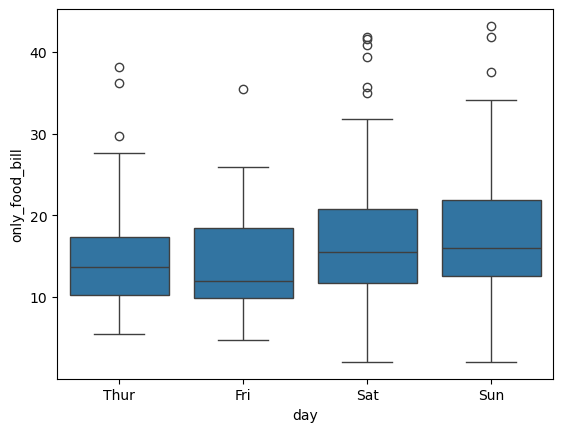

In [52]:
sns.boxplot(x = "day",y = "only_food_bill",data = df);

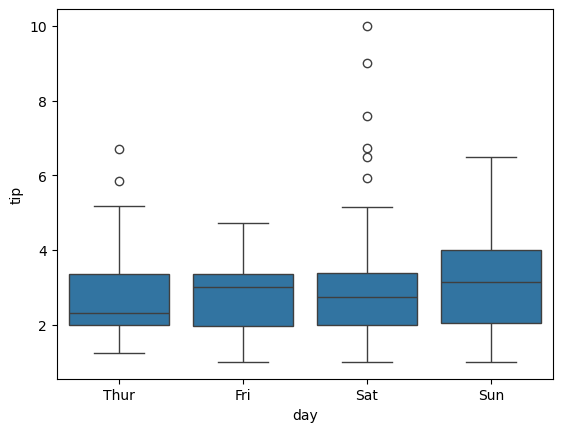

In [54]:
sns.boxplot(x = "day", y = "tip", data = df);

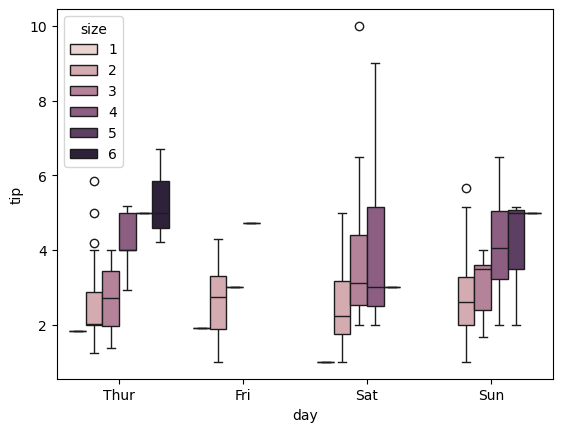

In [58]:
sns.boxplot(x = "day", y = "tip", hue = "size",data = df);

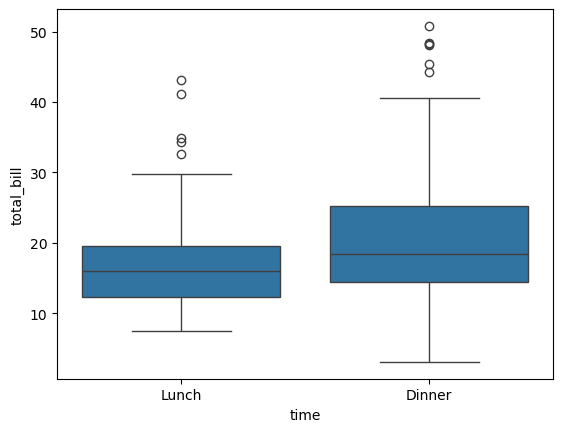

In [6]:
sns.boxplot(x = "time" , y = "total_bill", data = df);

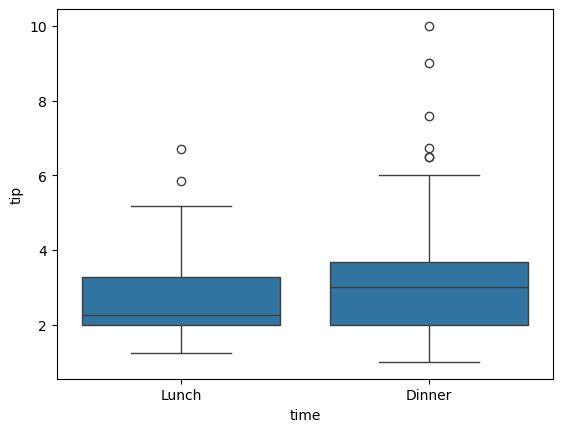

In [7]:
sns.boxplot(x = "time" , y = "tip", data = df);

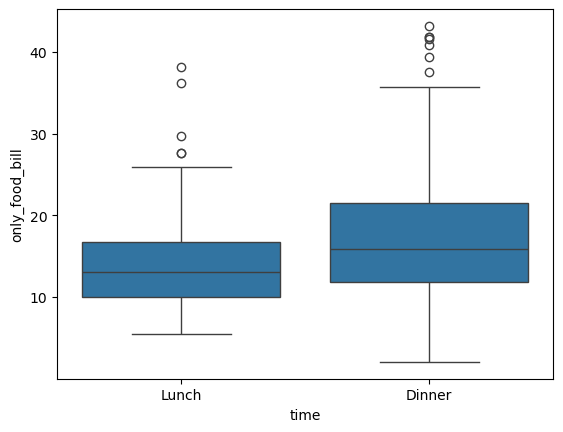

In [10]:
sns.boxplot(x = "time" , y = "only_food_bill", data = df);

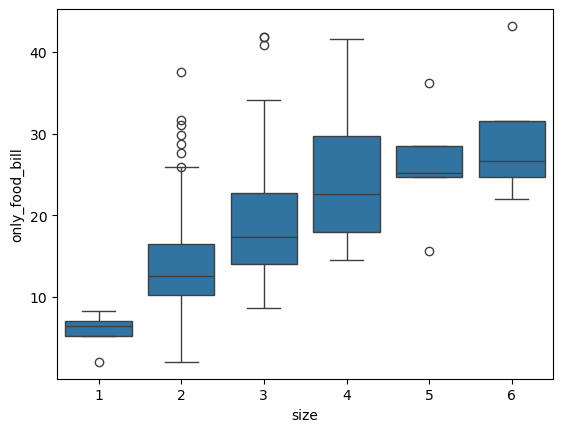

In [12]:
sns.boxplot(x = "size" , y = "only_food_bill", data = df);

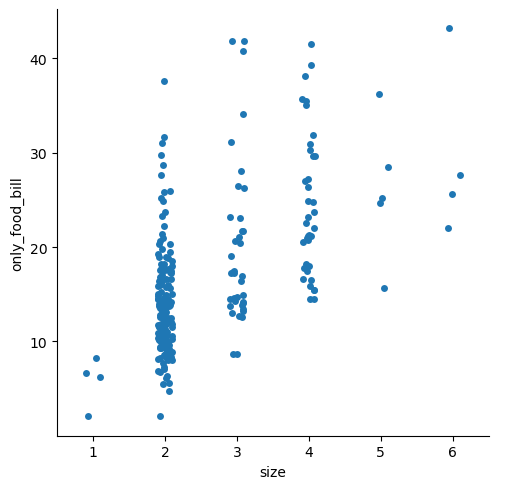

In [17]:
sns.catplot(y = "only_food_bill", x = "size",  data = df);